## Questions to Answer during Exploration

* What is the distributions of realized returns and cash yield?
* Are targeted vs. realized returns statistically biased?
* Which investments are most/least risky?
* How have investments performed over time?
* What are the best regions of the country to invest in?
* Who are the most successful sponsors on the platform (by type)?
* What is the typical timing of investment? (open, taking funds, closed, first distribution, exit of deal)
* Have the type of deals being offered changed?
* What is working so well in Texas?



In [110]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
sns.set()

In [111]:
%run zero2-jj-data-cleaning.ipynb

In [112]:
df = clean_crowd_street(infile="../data/raw/Offerings_2019-10-25.csv", 
                   outfile="../data/processed/clean_crowdstreet.csv"
                  )

In [113]:
df.head()

,sponsor,sponsor_experience,offering,offering_city,offering_state,property_type,investment_structure,investment_profile,targeted_investor_irr_pct,targeted_investor_equity_multiple,...,date_funds_due,date_closed,offering_status,first_distribution_period_end_date,first_distribution_payment_date,last_distribution_period_end_date,last_distribution_payment_date,last_tax_document_date,realized_investor_equity_multiple,realized_avg_annual_cash_yield_pct
0,crowdstreet investments,blended,crowdstreet blended portfolio - series v,multiple,or,multi-use,equity,value add,18.0,2.0,...,NaT,NaT,funding,NaT,NaT,NaT,NaT,NaT,NaN,NaN
1,crowdstreet advisors,blended,private managed accounts by crowdstreet advisors,portland,or,multi-use,equity,value add,NaN,NaN,...,NaT,NaT,funding,NaT,NaT,NaT,NaT,NaT,NaN,NaN
2,crowdstreet advisors,blended,crowdstreet opportunity zone portfolio,multiple,multiple,multi-use,equity,opportunistic,10.0,2.0,...,2019-11-07,2019-11-04,funding,NaT,NaT,NaT,NaT,NaT,NaN,NaN
3,trion properties,seasoned,meadows apartments,newark,ca,multifamily,equity,value add,15.9,1.5,...,2019-11-05,2019-11-01,funding,NaT,NaT,NaT,NaT,NaT,NaN,NaN
4,capstone realty group,tenured,1700 palm beach lakes,west palm beach,fl,office,equity,value add,19.1,2.0,...,2019-10-30,NaT,funding,NaT,NaT,NaT,NaT,NaT,NaN,NaN


## What is the distributions of realized returns and cash yields?

In [114]:
def univariate_summary(df, var):
    description = df[var].describe()
    plot = sns.distplot(df[var].dropna())
    return description, plot
    
    

(count    196.000000
 mean       0.266888
 std        0.427997
 min        0.010000
 25%        0.040000
 50%        0.110000
 75%        0.212500
 max        2.310000
 Name: realized_investor_equity_multiple, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa4690143c8>)

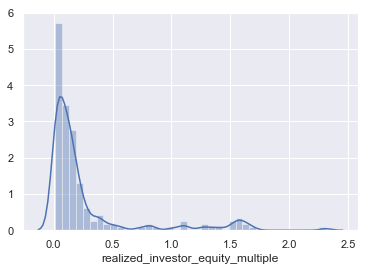

In [115]:
univariate_summary(df=df, var='realized_investor_equity_multiple')

**Observations on Graph Above**

* Lower realized multiple than I expected, thinking mean greater than 1, but it is not

(count    147.000000
 mean       0.008355
 std        0.013652
 min        0.000100
 25%        0.001100
 50%        0.002700
 75%        0.008000
 max        0.069200
 Name: realized_avg_annual_cash_yield_pct, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa479108a58>)

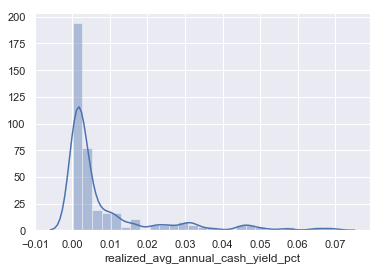

In [116]:
univariate_summary(df=df, var='realized_avg_annual_cash_yield_pct')

**Observations on Graph Above**

* Lower realized cash yield than I expected, thinking mean greater than 10%, but it is not the case

## Are targeted vs. realized returns statistically biased?

In [117]:
def compare_two_vars(df, var1, var2):
    plot = sns.scatterplot(x=var1, y=var2, data=df)
    sns.distplot(df[[var1]], hist=False, rug=True)
    sns.distplot(df[[var2]], hist=False, rug=True)
    t_test = ttest_ind(df[var1], df[var2], nan_policy='omit')
    return plot, t_test

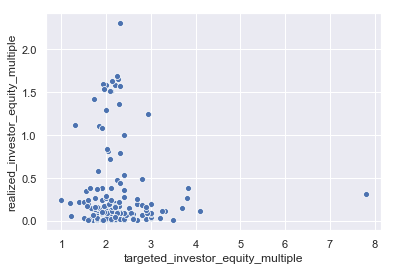

In [118]:
sns.scatterplot(x="targeted_investor_equity_multiple", y="realized_investor_equity_multiple", data=df)

**Observations on Graph Above**

* Little correlation between the target and what was realized

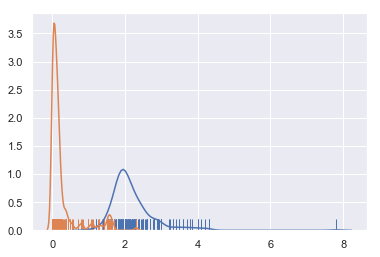

In [119]:
sns.distplot(df[['targeted_investor_equity_multiple']], hist=False, rug=True)
sns.distplot(df[['realized_investor_equity_multiple']], hist=False, rug=True)

**Observations on Graph Above**

* Distribution of projected vs. realized look way off
* Statistics below show the difference of means being statistically significant

In [120]:
ttest_ind(df['targeted_investor_equity_multiple'], df['realized_investor_equity_multiple'], nan_policy='omit')

Ttest_indResult(statistic=38.052095883146734, pvalue=3.175025806145593e-151)

## Which investments are most/least risky?

In [121]:
df.columns

Index(['sponsor', 'sponsor_experience', 'offering', 'offering_city',
       'offering_state', 'property_type', 'investment_structure',
       'investment_profile', 'targeted_investor_irr_pct',
       'targeted_investor_equity_multiple',
       'targeted_avg_annual_cash_yield_pct', 'targeted_distribution_period',
       'targeted_investment_period_years', 'targeted_first_distribution_date',
       'preferred_return_pct', 'minimum_investment_dollars',
       'loan_to_cost_pct', 'investor_accreditation', '1031_exchange',
       'opportunity_zone', 'date_funds_due', 'date_closed', 'offering_status',
       'first_distribution_period_end_date', 'first_distribution_payment_date',
       'last_distribution_period_end_date', 'last_distribution_payment_date',
       'last_tax_document_date', 'realized_investor_equity_multiple',
       'realized_avg_annual_cash_yield_pct'],
      dtype='object')

In [122]:
df['risk'] = df['realized_investor_equity_multiple'] - df['targeted_investor_equity_multiple']

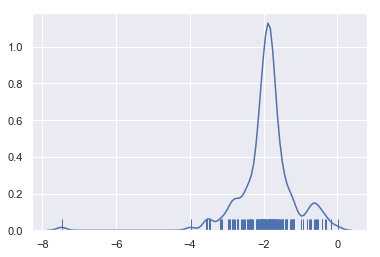

In [123]:
sns.distplot(df[['risk']], hist=False, rug=True)

**Observations on Graph Above**

* Distribution is negative, meaning most of the time investments underperform

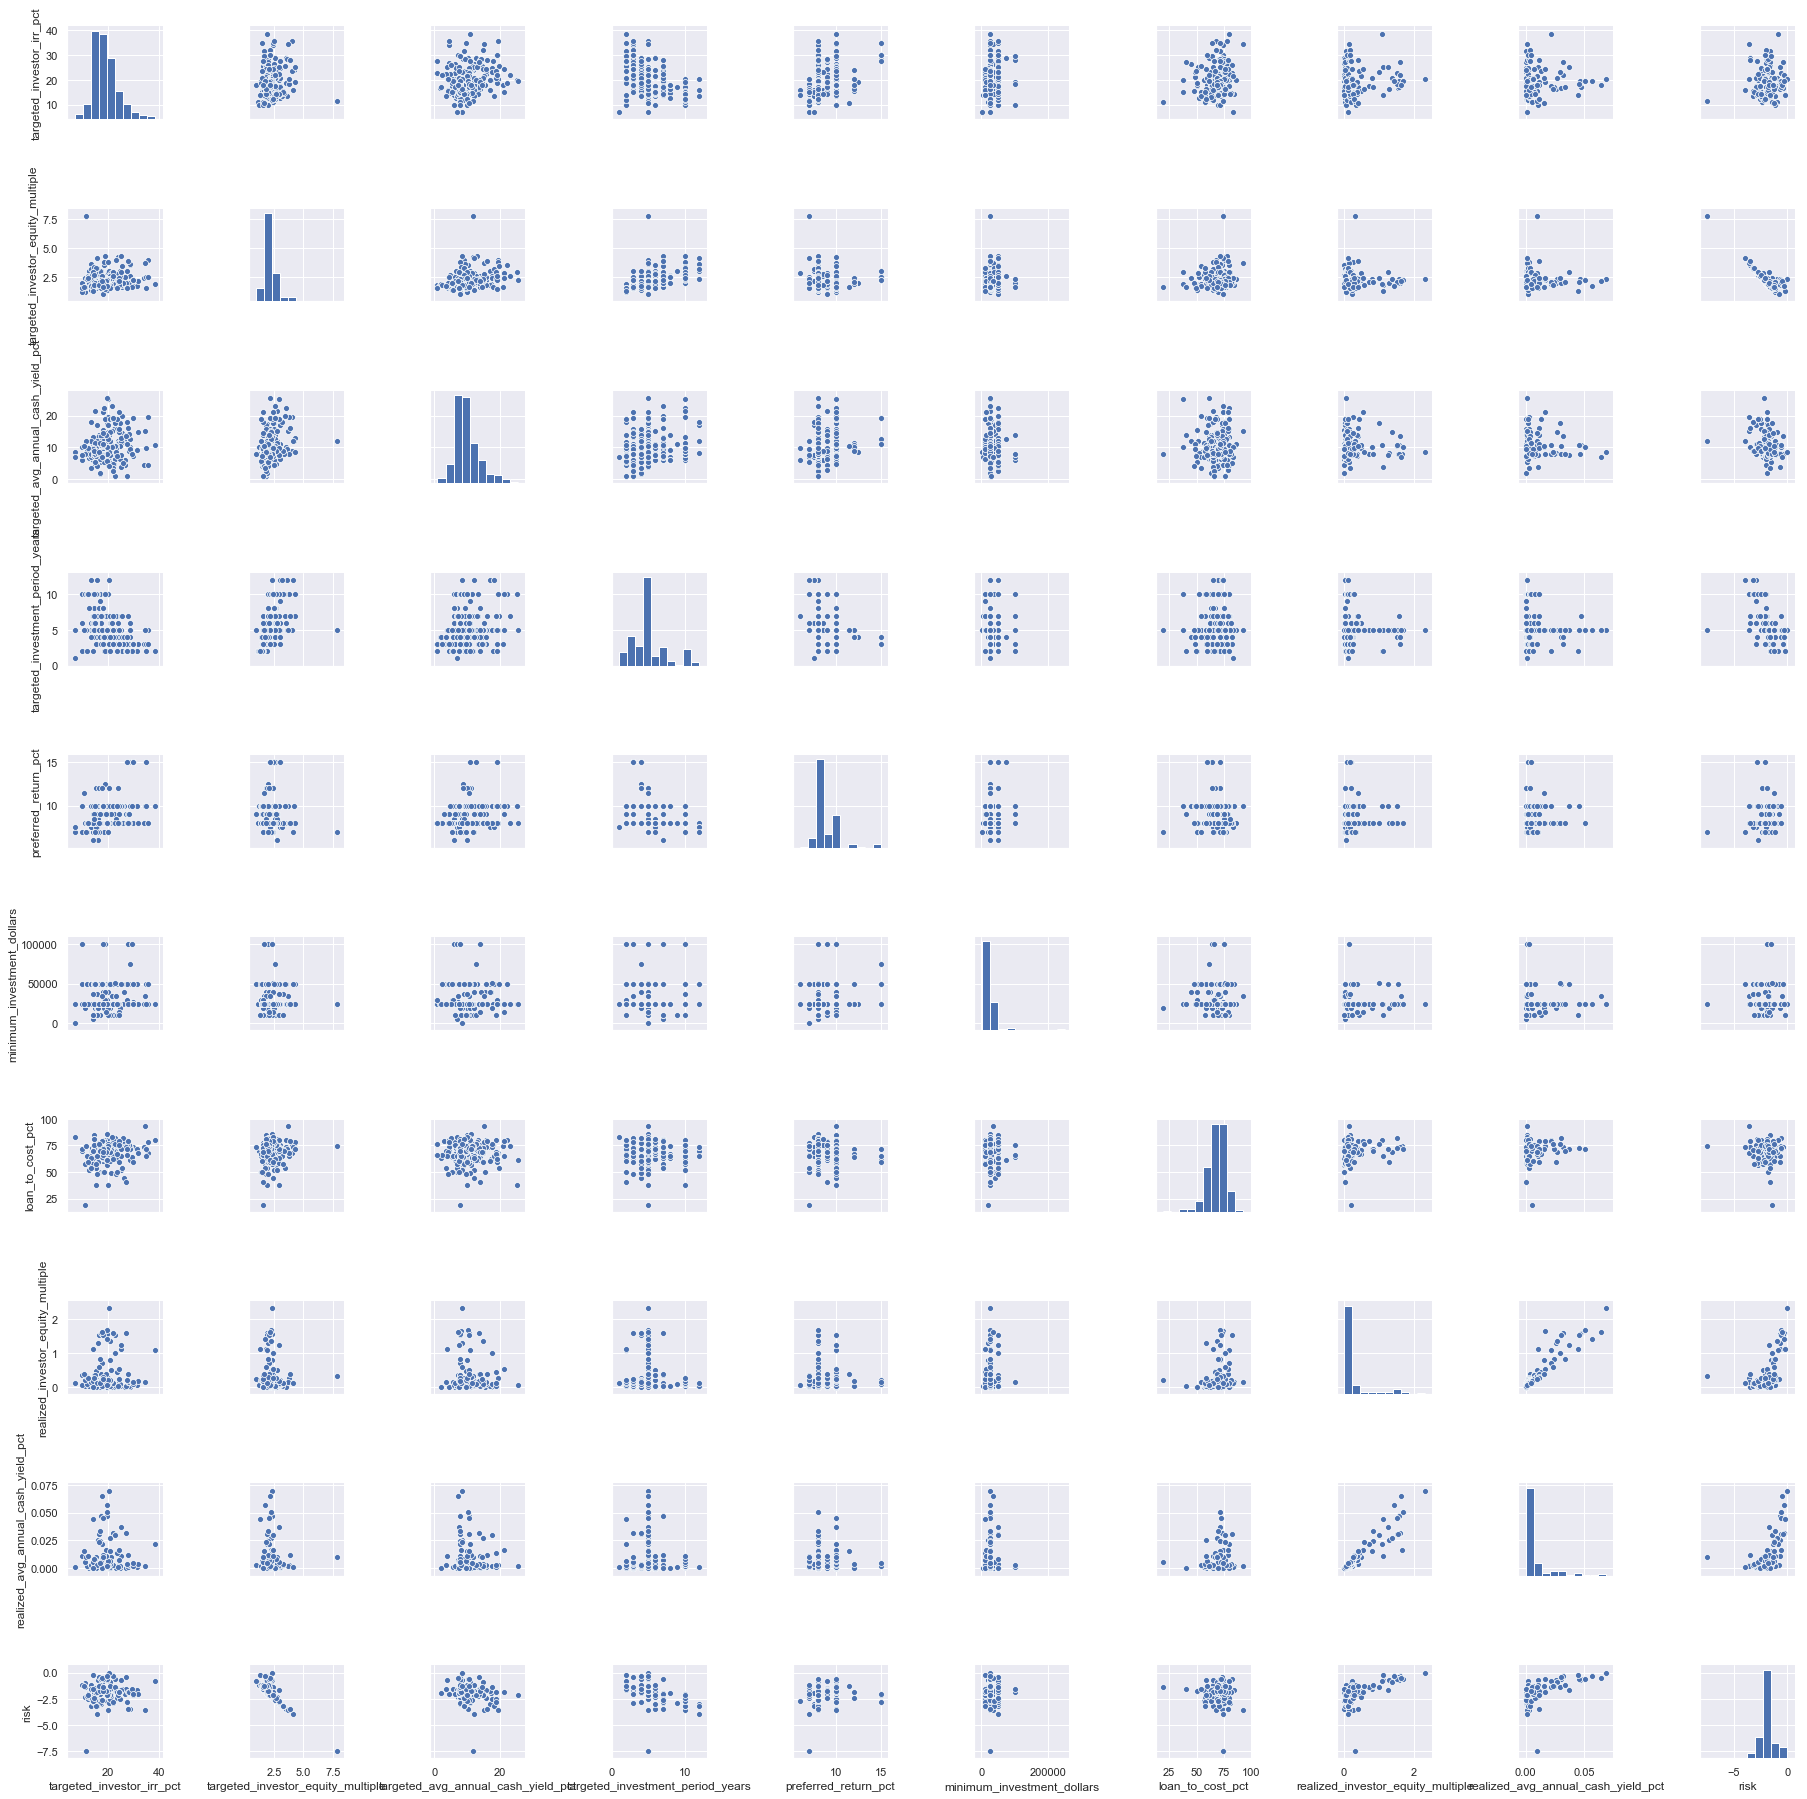

In [124]:
sns_plot = sns.pairplot(df)

In [125]:
sns_plot.savefig("scatter_plot_matrix.png")

**Observations on Graph Above**

* The higher the targeted investor multiplier the more likely investment underperformed

* The longer the investing period the more likely the investment under performed


## How have investments performed over time?

In [126]:
def plot_series(df, date_var, series_var):
    data = df[[date_var, series_var]].dropna()
    return sns.lineplot(x=date_var, y=series_var, data=data)

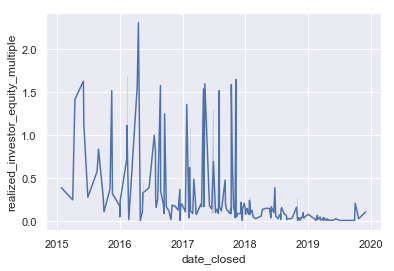

In [127]:
plot_series(df=df,date_var='date_closed', 
            series_var='realized_investor_equity_multiple'
           )

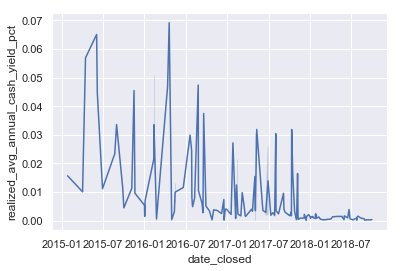

In [128]:
plot_series(df=df,date_var='date_closed', 
            series_var='realized_avg_annual_cash_yield_pct'
           )

In [129]:
df['date_closed'].dt.year

0         NaN
1         NaN
2      2019.0
3      2019.0
4         NaN
5      2019.0
6      2019.0
7      2019.0
8      2019.0
9      2019.0
10     2019.0
11     2019.0
12     2019.0
13     2019.0
14     2019.0
15        NaN
16     2019.0
17     2019.0
18     2019.0
19     2019.0
20     2019.0
21     2019.0
22     2019.0
23     2019.0
24     2019.0
25     2019.0
26     2019.0
27     2019.0
28     2019.0
29     2019.0
        ...  
294    2016.0
295    2016.0
296    2016.0
297    2016.0
298    2016.0
299    2016.0
300    2016.0
301    2016.0
302    2016.0
303    2016.0
304    2016.0
305    2016.0
306    2016.0
307    2016.0
308    2016.0
309    2016.0
310    2015.0
311    2015.0
312    2015.0
313    2015.0
314    2015.0
315    2015.0
316    2015.0
317    2015.0
318    2015.0
319    2015.0
320    2015.0
321    2015.0
322    2015.0
323    2015.0
Name: date_closed, Length: 324, dtype: float64

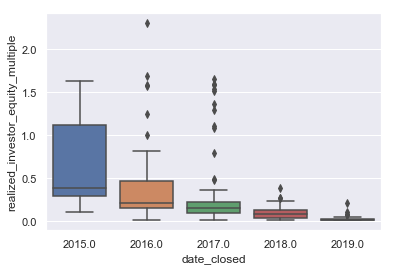

In [130]:
sns.boxplot(x=df['date_closed'].dt.year, \
            y=df['realized_investor_equity_multiple']
)

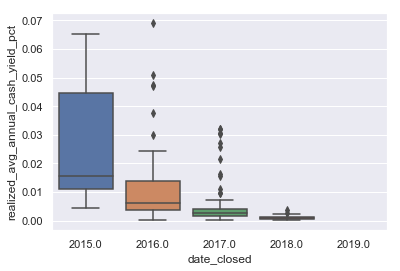

In [131]:
sns.boxplot(x=df['date_closed'].dt.year, \
            y=df['realized_avg_annual_cash_yield_pct']
)

**Observations on Graph Above**

* Investment performance for the investments have declined in general


## What are the best regions of the country to invest in?

In [132]:

groupby = df.groupby('offering_state')
result = groupby['realized_avg_annual_cash_yield_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
offering_state,,,,,,,,
al,2.0,0.005850,0.007707,0.0004,0.003125,0.00585,0.008575,0.0113
ar,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
az,5.0,0.019100,0.012661,0.0038,0.011200,0.01650,0.030400,0.0336
ca,6.0,0.006050,0.008423,0.0003,0.000700,0.00185,0.008325,0.0215
co,6.0,0.002167,0.001698,0.0002,0.001250,0.00155,0.003425,0.0045
ct,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dc,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fl,14.0,0.009229,0.013280,0.0008,0.001425,0.00270,0.009150,0.0470
ga,4.0,0.001375,0.000954,0.0008,0.000875,0.00095,0.001450,0.0028


In [133]:
groupby = df.groupby('offering_state')
result = groupby['realized_investor_equity_multiple'].describe()
result

,count,mean,std,min,25%,50%,75%,max
offering_state,,,,,,,,
al,2.0,0.210000,0.240416,0.04,0.1250,0.210,0.2950,0.38
ar,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
az,5.0,0.896000,0.678034,0.19,0.2800,0.840,1.5200,1.65
ca,6.0,0.275000,0.402082,0.03,0.0700,0.110,0.2250,1.08
co,6.0,0.113333,0.059217,0.02,0.0950,0.115,0.1350,0.20
ct,1.0,0.010000,NaN,0.01,0.0100,0.010,0.0100,0.01
dc,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fl,19.0,0.276316,0.386612,0.01,0.0800,0.140,0.2300,1.57
ga,8.0,0.076250,0.035026,0.03,0.0550,0.075,0.0925,0.14


**Observations on Graph Above**

* Texas appears to be a good region for investments


## Who are the most successful sponsors on the platform (by type)?

In [134]:
groupby = df.groupby('sponsor_experience')
result = groupby['realized_investor_equity_multiple'].describe()
result

,count,mean,std,min,25%,50%,75%,max
sponsor_experience,,,,,,,,
blended,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emerging,35.0,0.227714,0.362249,0.01,0.05,0.10,0.205,1.69
enterprise,2.0,0.030000,0.028284,0.01,0.02,0.03,0.040,0.05
seasoned,77.0,0.296883,0.462246,0.01,0.06,0.12,0.220,2.31
tenured,82.0,0.261220,0.427180,0.01,0.04,0.11,0.200,1.65


In [135]:
groupby = df.groupby('sponsor_experience')
result = groupby['realized_avg_annual_cash_yield_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
sponsor_experience,,,,,,,,
blended,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emerging,28.0,0.007829,0.014142,0.0002,0.000875,0.00235,0.006200,0.0569
enterprise,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seasoned,62.0,0.008219,0.014241,0.0002,0.001225,0.00275,0.006675,0.0692
tenured,57.0,0.008761,0.012971,0.0001,0.001100,0.00320,0.009600,0.0474


**Observations on Graph Above**

* Only go for 'seasoned' sponsors they have the best returns


## What is the typical timing of investment? (open, taking funds, closed, first distribution, exit of deal)

In [136]:
keep_vars = ['date_funds_due', 
             'date_closed', 
             'first_distribution_payment_date', 
             'last_distribution_payment_date'
            ]
dates = df[keep_vars].dropna()

In [137]:
dates['due_minus_closed'] = dates['date_funds_due'] - dates['date_closed']

In [138]:
dates['due_minus_closed'].describe()

count                         40
mean            10 days 16:12:00
std      12 days 02:19:05.641967
min           -31 days +00:00:00
25%              3 days 00:00:00
50%              9 days 00:00:00
75%             18 days 00:00:00
max             44 days 00:00:00
Name: due_minus_closed, dtype: object

In [139]:
dates['due_minus_firstdistro'] = dates['first_distribution_payment_date'] - dates['date_funds_due']

In [140]:
dates['due_minus_firstdistro'].describe()

count                          40
mean             46 days 14:24:00
std      143 days 23:08:08.841779
min           -687 days +00:00:00
25%              34 days 18:00:00
50%              56 days 00:00:00
75%             108 days 06:00:00
max             293 days 00:00:00
Name: due_minus_firstdistro, dtype: object

**Observations on Graph Above**

* Funds are due 10 days after closing
* First distribution check typically within 60 days (2 months)

## Have the type of deals being offered changed?

In [141]:
df['date_closed_year'] = df['date_closed'].dt.year
df.groupby('date_closed_year')['property_type'].value_counts()

date_closed_year  property_type 
2015.0            multifamily        6
                  office             3
                  multi-use          2
                  retail             1
                  senior housing     1
                  storage            1
2016.0            multifamily       20
                  office             9
                  hospitality        5
                  multi-use          5
                  senior housing     3
                  retail             2
                  industrial         1
2017.0            multifamily       41
                  office            10
                  multi-use          9
                  hospitality        7
                  industrial         4
                  retail             4
                  storage            1
2018.0            multifamily       31
                  multi-use         15
                  hospitality       14
                  office            10
                  retail       

**Observations on Graph Above**

* Multifamily is consistently at the top with 4 times the offers as the second highest category


In [142]:
df.groupby('date_closed_year')['sponsor_experience'].value_counts()

date_closed_year  sponsor_experience
2015.0            tenured                7
                  seasoned               4
                  emerging               3
2016.0            emerging              15
                  seasoned              15
                  tenured               15
2017.0            seasoned              32
                  tenured               30
                  emerging              14
2018.0            tenured               40
                  seasoned              29
                  emerging              19
2019.0            tenured               41
                  seasoned              31
                  emerging              15
                  blended                5
                  enterprise             2
Name: sponsor_experience, dtype: int64

**Observations on Graph Above**

* Emerging investors are decreasing with more tenured ones taking their place

In [143]:
df.groupby('date_closed_year')['investment_profile'].value_counts()

date_closed_year  investment_profile
2015.0            value add              9
                  core plus              3
                  core                   1
                  opportunistic          1
2016.0            value add             22
                  core plus             12
                  opportunistic          6
                  development            4
                  core                   1
2017.0            value add             47
                  development           12
                  core plus             11
                  opportunistic          6
2018.0            value add             57
                  core plus             14
                  development           10
                  opportunistic          7
2019.0            value add             49
                  core plus             20
                  development           17
                  opportunistic          8
Name: investment_profile, dtype: int64

**Observations on Graph Above**

* In 2019 many more core plus investments were offered

In [144]:
df.columns

Index(['sponsor', 'sponsor_experience', 'offering', 'offering_city',
       'offering_state', 'property_type', 'investment_structure',
       'investment_profile', 'targeted_investor_irr_pct',
       'targeted_investor_equity_multiple',
       'targeted_avg_annual_cash_yield_pct', 'targeted_distribution_period',
       'targeted_investment_period_years', 'targeted_first_distribution_date',
       'preferred_return_pct', 'minimum_investment_dollars',
       'loan_to_cost_pct', 'investor_accreditation', '1031_exchange',
       'opportunity_zone', 'date_funds_due', 'date_closed', 'offering_status',
       'first_distribution_period_end_date', 'first_distribution_payment_date',
       'last_distribution_period_end_date', 'last_distribution_payment_date',
       'last_tax_document_date', 'realized_investor_equity_multiple',
       'realized_avg_annual_cash_yield_pct', 'risk', 'date_closed_year'],
      dtype='object')

## What is working so well in Texas?

In [146]:
df[df['offering_state'] == 'tx']

,sponsor,sponsor_experience,offering,offering_city,offering_state,property_type,investment_structure,investment_profile,targeted_investor_irr_pct,targeted_investor_equity_multiple,...,offering_status,first_distribution_period_end_date,first_distribution_payment_date,last_distribution_period_end_date,last_distribution_payment_date,last_tax_document_date,realized_investor_equity_multiple,realized_avg_annual_cash_yield_pct,risk,date_closed_year
16,mcfarlin group,seasoned,the ivy of mckinney,mckinney,tx,senior housing,equity,value add,19.1,2.00,...,closed,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,2019.0
19,gwr equities,seasoned,trails at city park,houston,tx,multifamily,equity,value add,15.2,2.50,...,funding,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,2019.0
25,rhodium capital advisors,seasoned,the willows apartments,kileen,tx,multifamily,equity,value add,18.0,1.80,...,closed,2019-09-30,2019-10-10,2019-09-30,2019-10-10,NaT,0.01,NaN,-1.79,2019.0
29,guefen development,tenured,haven at denton,denton,tx,multifamily,equity,opportunistic,20.6,1.80,...,closed,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,2019.0
30,cooper street capital,emerging,cascade apartments,austin,tx,multifamily,equity,value add,19.5,1.70,...,closed,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,2019.0
35,hunt properties inc,tenured,windmill ranch,odessa,tx,multifamily,equity,development,22.4,1.80,...,closed,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,2019.0
50,mcfarlin group,seasoned,the heritage at twin creeks,allen,tx,senior housing,equity,value add,23.9,2.20,...,closed,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,2019.0
57,km realty advisors llc,seasoned,"km realty investment trust, reit",multiple,tx,multi-use,reit,value add,NaN,NaN,...,funding,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN
58,nitya capital,seasoned,park central plaza one,houston,tx,office,equity,core plus,17.4,2.00,...,closed,2019-09-30,2019-09-16,2019-09-30,2019-09-16,NaT,0.02,NaN,-1.98,2019.0
62,provident realty advisors,tenured,plano industrial park,plano,tx,industrial,equity,development,19.4,1.70,...,closed,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,2019.0
